In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from scipy.io import loadmat
from os.path import basename
import numpy as np
from scipy import ndimage

In [3]:


def getLarea(input_mask):
    try:
        labeled_mask, cc_num = ndimage.label(input_mask)
        mask = (labeled_mask == (np.bincount(labeled_mask.flat)[1:].argmax() + 1))
    except:
        mask = input_mask
    return mask

def getkvgh(matfile):
    mat = loadmat(matfile)
    BMAstr = basename(matfile).split('.')[0][-1]
    T1map = mat['%s_T1map_pre' % BMAstr]
    imapre = mat['%s_im_pre' % BMAstr]
    LVb = mat['%s_inner' % BMAstr]
    LVw = mat['%s_LV_wall_non' % BMAstr]
    RVb = mat['%s_heart' % BMAstr] & np.logical_not(mat['%s_outer' % BMAstr])
    RVb = getLarea(RVb)
    labelimg = (LVb*0).astype(np.uint16)
    labelimg[np.nonzero(LVb)] = 3
    labelimg[np.nonzero(LVw)] = 2
    labelimg[np.nonzero(RVb)] = 1
    omatsize = T1map.shape
    return T1map, imapre, labelimg, omatsize

In [4]:
T1map, imapre, labelimg, omatsize = getkvgh(r'C:\TudoCD\T-995835-20151229_B.mat')
lvb = labelimg
LVbmask = (lvb==3)
LVwmask = (lvb==2)
RVbmask = (lvb==1)

heart_mask = lvb * 0
heart_mask[LVbmask>0] = 1
heart_mask[LVwmask>0] = 2
heart_mask[RVbmask>0] = 3

[12.46666667 15.91044776 19.44117647 12.2        12.04477612 12.42647059]


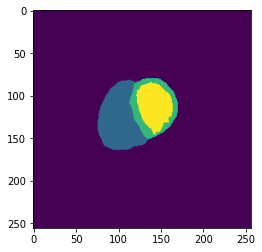

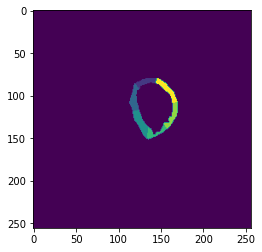

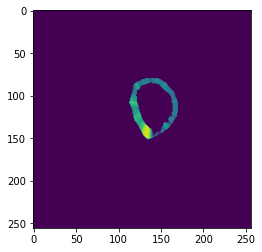

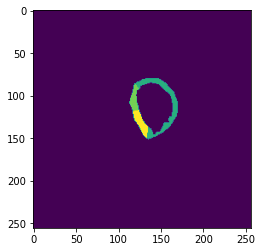

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymr.heart import get_seg, thick_ana_xy
heart_mask_xyt = (LVbmask, LVwmask, RVbmask)
label_mask = get_seg(heart_mask_xyt, nseg=6)
thick_result = thick_ana_xy(heart_mask_xyt, nseg=6)
thickmap = thick_result['thickmap']
thick = thick_result['thickness']
thickmap_mean = thick_result['thickmap_mean']



plt.figure()
plt.imshow(labelimg)
plt.figure()
plt.imshow(label_mask)
plt.figure()
plt.imshow(thickmap)
plt.figure()
plt.imshow(thickmap_mean)
print(thick)